# Importing libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Importing data

In [8]:
df = pd.read_csv("train.csv")

In [4]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [25]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

# Exploring the data

In [5]:
# statistical description
df.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


# checking for null values

In [14]:
df.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

# Dropping the null value

In [15]:
df.dropna()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


# checking for unique values

In [21]:
df.nunique()

textID           27481
text             27480
selected_text    22463
sentiment            3
dtype: int64

In [58]:
df1 = df.loc[:, ["text", "sentiment"]]
df1

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [63]:
# removing the qotations and other that not belong to alphabets using regex
df1["clean_text"] = df1["text"].str.replace("[^a-zA-Z]", " ", regex=True)

# converting the text to lower case
df1["clean_text"] = df1["clean_text"].str.lower()

df1

,text,sentiment,clean_text
0,"I`d have responded, if I were going",neutral,i d have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad i will miss you here in san diego
2,my boss is bullying me...,negative,my boss is bullying me
3,what interview! leave me alone,negative,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",negative,sons of why couldn t they put them on t...
...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,wish we could come see u on denver husband l...
27477,I`ve wondered about rake to. The client has ...,negative,i ve wondered about rake to the client has ...
27478,Yay good for both of you. Enjoy the break - y...,positive,yay good for both of you enjoy the break y...
27479,But it was worth it ****.,positive,but it was worth it


# removing the stopwords

In [89]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [80]:
eng_stopwords = stopwords.words("english")
eng_stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [95]:
w = []
for i in df1["clean_text"]:
    for word in word_tokenize(str(i)):
        if word not in eng_stopwords:
            w.append(word)

w

['responded',
 'going',
 'sooo',
 'sad',
 'miss',
 'san',
 'diego',
 'boss',
 'bullying',
 'interview',
 'leave',
 'alone',
 'sons',
 'put',
 'releases',
 'already',
 'bought',
 'http',
 'www',
 'dothebouncy',
 'com',
 'smf',
 'shameless',
 'plugging',
 'best',
 'rangers',
 'forum',
 'earth',
 'feedings',
 'baby',
 'fun',
 'smiles',
 'coos',
 'soooo',
 'high',
 'journey',
 'wow',
 'u',
 'became',
 'cooler',
 'hehe',
 'possible',
 'much',
 'love',
 'hopeful',
 'reckon',
 'chances',
 'minimal',
 'p',
 'never',
 'gon',
 'na',
 'get',
 'cake',
 'stuff',
 'really',
 'really',
 'like',
 'song',
 'love',
 'story',
 'taylor',
 'swift',
 'sharpie',
 'running',
 'dangerously',
 'low',
 'ink',
 'want',
 'go',
 'music',
 'tonight',
 'lost',
 'voice',
 'test',
 'test',
 'lg',
 'env',
 'uh',
 'oh',
 'sunburned',
 'ok',
 'trying',
 'plot',
 'alternatives',
 'speak',
 'sigh',
 'sick',
 'past',
 'days',
 'thus',
 'hair',
 'looks',
 'wierd',
 'didnt',
 'hat',
 'would',
 'look',
 'http',
 'tinyurl',
 'co

In [99]:
len(w)

197759

In [100]:
df1["clean_text"]

0                      i d have responded  if i were going
1            sooo sad i will miss you here in san diego   
2                                my boss is bullying me   
3                           what interview  leave me alone
4         sons of       why couldn t they put them on t...
                               ...                        
27476     wish we could come see u on denver  husband l...
27477     i ve wondered about rake to   the client has ...
27478     yay good for both of you  enjoy the break   y...
27479                           but it was worth it       
27480       all this flirting going on   the atg smiles...
Name: clean_text, Length: 27481, dtype: object

In [106]:
# final code for removing the stop words (include this code alone in this part)
df1["clean_text"] = df1["clean_text"].apply(
    lambda x: " ".join(
        [word for word in word_tokenize(str(x)) if word not in eng_stopwords]
    )
)

In [108]:
df1

,text,sentiment,clean_text,clean_text_1
0,"I`d have responded, if I were going",neutral,responded going,responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego,sooo sad miss san diego
2,my boss is bullying me...,negative,boss bullying,boss bullying
3,what interview! leave me alone,negative,interview leave alone,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,sons put releases already bought,sons put releases already bought
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,wish could come see u denver husband lost job ...,wish could come see u denver husband lost job ...
27477,I`ve wondered about rake to. The client has ...,negative,wondered rake client made clear net force devs...,wondered rake client made clear net force devs...
27478,Yay good for both of you. Enjoy the break - y...,positive,yay good enjoy break probably need hectic week...,yay good enjoy break probably need hectic week...
27479,But it was worth it ****.,positive,worth,worth


----

# model

## 1) lexicon - based classification


In [111]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [140]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("")["compound"]

-0.5423

In [129]:
df2 = df1.loc[:, ["clean_text", "sentiment"]]
df2.head()

,clean_text,sentiment
0,responded going,neutral
1,sooo sad miss san diego,negative
2,boss bullying,negative
3,interview leave alone,negative
4,sons put releases already bought,negative


In [134]:
df2["sentiment_score"] = df2["clean_text"].apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

In [135]:
df2

,clean_text,sentiment,sentiment_score
0,responded going,neutral,0.0000
1,sooo sad miss san diego,negative,-0.5719
2,boss bullying,negative,-0.5994
3,interview leave alone,negative,-0.2960
4,sons put releases already bought,negative,0.0000
...,...,...,...
27476,wish could come see u denver husband lost job ...,negative,0.1027
27477,wondered rake client made clear net force devs...,negative,0.3818
27478,yay good enjoy break probably need hectic week...,positive,0.9136
27479,worth,positive,0.2263


In [165]:
df2["pred_sentiment"] = df2["sentiment_score"].apply(
    lambda x: "positive" if x > 0.15 else "negative" if x < 0 else "neutral"
)

In [166]:
df2

,clean_text,sentiment,sentiment_score,pred_sentiment
0,responded going,neutral,0.0000,neutral
1,sooo sad miss san diego,negative,-0.5719,negative
2,boss bullying,negative,-0.5994,negative
3,interview leave alone,negative,-0.2960,negative
4,sons put releases already bought,negative,0.0000,neutral
...,...,...,...,...
27476,wish could come see u denver husband lost job ...,negative,0.1027,neutral
27477,wondered rake client made clear net force devs...,negative,0.3818,positive
27478,yay good enjoy break probably need hectic week...,positive,0.9136,positive
27479,worth,positive,0.2263,positive


In [ ]:
df['sentiment_score'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')

# getting the accurary

In [167]:
acc = 0
for i in range(27481):
    if df2.iloc[i, 1] == df2.iloc[i, 3]:
        acc += 1

In [188]:
acc_percent = round((acc / len(df2)) * 100)
print(f"------The accuracy percentage is {acc_percent}% ------")

------The accuracy percentage is 64% ------


# visualizing

<Axes: xlabel='sentiment', ylabel='sentiment_score'>

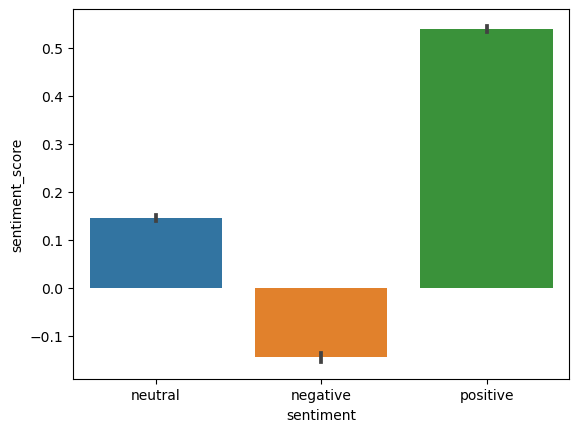

In [170]:
sns.barplot(data=df2, x="sentiment", y="sentiment_score")

In [175]:
df2.groupby(["sentiment"])["sentiment_score"].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
negative,7781.0,-0.144958,0.404720,-0.9726,-0.4767,-0.1531,0.0516,0.9277
neutral,11118.0,0.144981,0.316339,-0.9313,0.0000,0.0000,0.3818,0.9590
positive,8582.0,0.538789,0.303704,-0.8910,0.4215,0.5994,0.7716,0.9826


In [176]:
df2.groupby(["pred_sentiment"])["sentiment_score"].describe()

,count,mean,std,min,25%,50%,75%,max
pred_sentiment,,,,,,,,
negative,6163.0,-0.402120,0.215878,-0.9726,-0.5423,-0.4215,-0.2263,-0.0018
neutral,7991.0,0.008054,0.025737,0.0000,0.0000,0.0000,0.0000,0.1496
positive,13327.0,0.564401,0.199801,0.1513,0.4215,0.5719,0.7269,0.9826
